<a id='start'></a>
# Regressione

In questo notebook viene spiegato come effettuare una regressione lineare su dei dati utilizzando le librerie **Pandas** e **NumPy**. <br>
<br>
Il notebook è suddiviso nelle seguenti sezioni:<br>
- [La regressione lineare](#section1)
    - [Il metodo dei minimi quadrati (Ordinary Least Square method)](#section2)
    - [Una semplice regressione lineare con python](#section3)
    - [Compredndere le tabelle di regressione](#section4)
    - [Visualizziamo ora il risultato della nostra regressione](#section5)
- [Regressione lineare multipla](#section6)
    - [Analizziamo i dati](#section7)
    - [Realizziamo la regressione con Pyhton](#section8)
    - [Visualizziamo il risultato](#section9)

<a id='section1'></a>
## La regressione lineare

La regressione lineare è un meccanismo con cui studiare la relazione tra due variabili.<br/>
Attraverso la regressione si punta a costruire un modello attraverso cui prevedere i valori di una variabile dipendente o risposta (quantitativa) a partire dai valori di una o più variabili indipendenti o esplicative.

Solitamente nel modello di regressione si indica con:
- Y la variabile dipendente
- X la variabile esplicativa (o indipendente)


<img src="img/regressione.png">

Per studiare la relazione tra due variabili è utile il diagramma di dispersione in cui si riportano i valori della variabile esplicativa X sull’asse delle ascisse e i valori della variabile dipendente Y sull’asse delle ordinate.

La relazione tra due variabili può essere espressa mediante funzioni matematiche più o meno complesse tramite un modello di regressione.

Il modello di regressione lineare semplice è adatto quando i valori delle variabili X e Y si distribuiscono lungo una retta nel diagramma di dispersione. 

<a id='section2'></a>
### Il metodo dei minimi quadrati (Ordinary Least Square method)

Il metodo dei minimi quadrati cerca di "disegnare" una linea su uno scatter plot in modo da minimizzare la distanza di ogni singola osservazione dalal linea:

<img src="img/regressione2.png">

Per riuscirci l'algoritmo dei minimi quadrati minimizza la somma di tutti i quadrati delle deviazioni dalla linea: 

<img src="img/minimi-quadrati.png">

Ecco una più chiara rappresentaazione dei calcoli realizzati:

<img src="img/linear_regression.jpg">

<a id='section3'></a>
### Una semplice regressione lineare con python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import preprocessing

Tra le librerie importate abbiamo **Pandas** e **NumPy**.

In [2]:
# Load the data from a .csv in the same folder
data = pd.read_csv('data/simple_linear_regression.csv')
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


Questo dataset ha due colonne che rappresentano dei dati su degli studenti universitari statunitensi:
1. nella prima colonna sono riportati i risultati del test SAT di ogni studente
1. nella secondacolonna, invece, abbiamo il GPA (Grade Point Average) ovvero, potremmo dire, "la media" dei voti degli esami.

La domanda che potremmo porci è se chi ha ottenuto un punteggio alto nel test SAT ha anche una media più alta negli esami, ovvero se le due variabili correlano e quindi se è possibile creare un modello di regressione per prevedere l'andamento universitario di uno studente in base al suo punteggio al test di ammissione SAT.

In [3]:
# This method gives us very nice descriptive statistics. We don't need this as of now, but will later on!
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


Definiamo le variabili dipendente e indipendente:

In [30]:
# Following the regression equation, our dependent variable (y) is the GPA
y = data['GPA']
# Similarly, our independent variable (x) is the SAT score
x1 = data['SAT']

Esploriamo i dati:

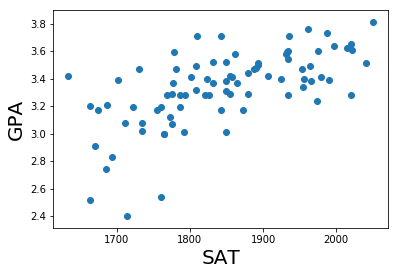

In [31]:
# Plot a scatter plot (first we put the horizontal axis, then the vertical axis)
plt.scatter(x1, y)
# Name the axes
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
# Show the plot
plt.show()

È buona pratica nel machine learning eseguire l'addestramento su un set di dati per poi verificare i risultati delle sue predizioni con un altro set contente dati non visti durante l'addestramento.

Questo garantisce che il nostro modello è in grado di generalizzare su dati sconosciuti e quindi ha realmente "imparato" dai dati, piuttosto che limitarsi a memorizzare il set di addestramento, condizione conosciuta come **overfitting**. 

Per fare questo dobbiamo suddividere il nostro dataset in due set distinti, uno da utilizzare unicamente per l'addestramento e un altro da utilizzare per il test, possiamo farlo utilizzando il metodo `train_test_split` di `scikit-learn`.

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x1, y, test_size=0.3, random_state=0)

Adesso abbiamo tutto ciò che ci serve per costruire il modello di regressione lineare, possiamo fare la regressione in due modi:
1. con la libreria `statmodel`, oppure
1. con la libreria `scikit-learn`

#### Partiamo con la libreria statmodel
Realizziamo infine la regressione, utilizeremo la classe statsmodel con la classe OLS (ordinary least squares):

In [33]:
help(sm.OLS)

Help on class OLS in module statsmodels.regression.linear_model:

class OLS(WLS)
 |  OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)
 |  
 |  A simple ordinary least squares model.
 |  
 |  
 |  Parameters
 |  ----------
 |  endog : array-like
 |      1-d endogenous response variable. The dependent variable.
 |  exog : array-like
 |      A nobs x k array where `nobs` is the number of observations and `k`
 |      is the number of regressors. An intercept is not included by default
 |      and should be added by the user. See
 |      :func:`statsmodels.tools.add_constant`.
 |  missing : str
 |      Available options are 'none', 'drop', and 'raise'. If 'none', no nan
 |      checking is done. If 'drop', any observations with nans are dropped.
 |      If 'raise', an error is raised. Default is 'none.'
 |  hasconst : None or bool
 |      Indicates whether the RHS includes a user-supplied constant. If True,
 |      a constant is not checked for and k_constant is set to 1 and a

In [12]:
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(X_train)
x.head()

,const,SAT
72,1.0,1975
6,1.0,1764
3,1.0,1685
68,1.0,1861
59,1.0,1891


In [35]:
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(Y_train, X_train).fit()
Y_pred_train = results.predict(X_train) # eseguiamo la predizione sul train set
Y_pred_test = results.predict(X_test) # eseguiamo la predizione anche sul test set

Ottimo! Abbiamo appena costriuto il nostro primo modello di regressione e abbiamo eseguito la nostra prima predizione. Adesso bisogna vedere quanto buono è questo modello.
Per farlo dobbiamo definire una metrica che ci permetterà di misurare quanto le predizioni del modello si avvicinano ai valori corretti.
Una metrica semplice che fa proprio questo è l'**errore quadratico medio** (mean squadred error - MSE).

In [36]:
from sklearn.metrics import mean_squared_error

print("MSE train: %f" % mean_squared_error(Y_train, Y_pred_train))
print("MSE test: %f" % mean_squared_error(Y_test, Y_pred_test))

MSE train: 0.046933
MSE test: 0.036776


Come vanno interpretati questi valori? Estraendo la radice quadrata dell'MSE otteniamo un valore che indica mediamente di quanto si è sbagliato il modello. Nel nostro caso, il test set ha ottenuto un MSE di 0.03 la cui radice quadrata è circa 0.17, considerando che il GPA, stimato, è un numero quasi sempre attorno al 3 questo ci dice che in media il modello ha fatto cilecca per circa 0.5. 

Una metrica più intuitiva è il **coefficiente di indeterminazione** (anche conosciuto come punteggio R2), che può essere inteso come una versione standardizzata del MSE e ritorna un valore compreso tra 0 e 1 che può essere letto in questo modo:

- R2_score < 0.3 il modello è inutile.
- 0.3 < R2_score < 0.5 il modello è scarso.
- 0.5 < R2_score < 0.7 il modello è discreto.
- 0.7 < R2_score < 0.9 il modello è buono.
- 0.9 < R2_score < 1 il modello è ottimo.
- R2_score = 1 molto probabilmente c'è un errore nel modello.

In [37]:
from sklearn.metrics import r2_score

print("R2 train: %f" % r2_score(Y_train, Y_pred_train))
print("R2 test: %f" % r2_score(Y_test, Y_pred_test))

R2 train: 0.388357
R2 test: 0.389485


Tutti questi dati, e molti altri, possono essere facilmente visti guardato le statistiche del risultato prodotto dal modello.

In [38]:
# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.331e+04
Date:                Sun, 17 Mar 2019   Prob (F-statistic):           2.96e-69
Time:                        22:37:26   Log-Likelihood:                 6.4133
No. Observations:                  58   AIC:                            -10.83
Df Residuals:                      57   BIC:                            -8.766
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SAT            0.0018   1.56e-05    115.382      0.000       0.002       0.002
==============================================================================
Omnibus:                        2.956   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.228   Jarque-Bera (JB):                2.146
Skew:                          -0.269   Prob(JB):                        0.342
Kurtosis:                       3.774   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Vediamo ora come usare scikit-learn
Realizziamo la stessa regressione, utilizzando la libreria scikit-learn.

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data[['GPA']]
Y = data['SAT']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# with sklearn
regr = LinearRegression()
regr.fit(X_train, Y_train)

Y_pred_train = regr.predict(X_train) # eseguiamo la predizione sul train set
Y_pred_test = regr.predict(X_test) # eseguiamo la predizione anche sul test set

Valutiamo la qualità del modello utilizzando il metodo del R2:

In [45]:
from sklearn.metrics import r2_score

print("R2 train: %f" % r2_score(Y_train, Y_pred_train))
print("R2 test: %f" % r2_score(Y_test, Y_pred_test))

R2 train: 0.389394
R2 test: 0.425082


La libreria `scikit-learn` non ha possibilità di stampare un summary del modello, come fatto da `statmodel`.

<a id='section4'></a>
### Comprendere le tabelle di regressione

Come abbiamo visto, al termine di una regressione lineare possiamo chiedere alle librerie python di stamparci delle tabelel che mostrano i risultati del processo di regressione appena realizzato.

Il problema della bassa qualità del nostro modello, nell'esempio di prima, è quasi sicurmente dovuto alla scarsa numerosità dei dati in ingresso. Proviamo quindi a rieseguire un modello sull'intera popolazione di dati disponibili.

In [48]:
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()
# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sun, 17 Mar 2019   Prob (F-statistic):           7.20e-11
Time:                        22:43:25   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Il risultato del sommario consiste di tre tabelle differenti:
1. il sommario del modello
1. una tabella con i coefficienti
1. una tabella con alcuni test addizionali

Queste tabelle contengono un gran numero di informazioni, noi ci concentreremo solo sulle parti più rilevanti.

Partiamo dalla seconda tabella, la tabella dei coefficienti.

In essa possiamo vedere il valore del coefficiente, ovvero il valore dell'intersezione della retta sull'asse y: 0.2750.

L'altro coefficiente, 0.0017, è invece la pendenza della retta.

Da questi dati possiamo ricavare l'equazione della retta di regressione che in questo caso è: <br/>
**GPA = 0.275 + 0.0017 * SAT**

La colonna standard error, ovviamente, mostra l'errore standard per i coefficienti calcolati. Più basso è lo standard error migliore è la stima.

<a id='section5'></a>
### Visualizziamo ora il risultato della nostra regressione

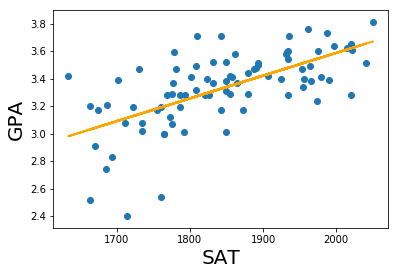

In [25]:
# Create a scatter plot
plt.scatter(x1, y)
# Define the regression equation, so we can plot it later
yhat = results.params.const + results.params.SAT * x1
# Plot the regression line against the independent variable (SAT)
fig = plt.plot(x1, yhat, lw=2, c='orange')
# Label the axes
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

<a id='section6'></a>
## Regressione lineare multipla

In casi reali, molto spesso, una variabile non dipende solamente dai valori di un'altra variabile, ma da un insieme di più dipendenze.

Per esempio se volessimo stimare il costo di una casa, dovremmo considerare diversi fattori:
- la posizione della casa
- la sua dimensione
- l'anno do costruzione

La variabile del costo della casa è dipendente da tutte queste altre variabili che abbiamo appena definito. In questo caso utilizziamo la **regressione multipla**.

Facciamo un esempio di regressione lineare multipla cercando di predire lo stock prixe (i.e., la variabile dipendente) di una economia ipotetica usando 2 variabili indipendenti di input:
- il tasso di interesse
- il tasso di disoccupazione

<a id='section7'></a>
### Analizziamo i dati

In [2]:
# Load the data from a .csv in the same folder
data = pd.read_csv('data/stock_price.csv')
data.head()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


Prima di procedere con l'esecuzione del modello di regressione lineare, è bene cercare di validare che certe assunzioni sui dati siano corrette.

Possiamo voler verificare che una relazaione lineare esista tra la variabile dipendente e le variaibli indipendenti. Nel nostro esempio, vogliavo supporre che esista una relazione tra:

- lo Stock_Index_Price (variabile dipendente) e l'Interest_Rate (variabile indipendente)
- lo Stock_Index_Price (variabile dipendente) e l'Unemployment_Rate (variabile indipendente)

Per fare un check veloce di linearità possiamo utilizzare un grafico scatter che andiamo subito a disegnare:

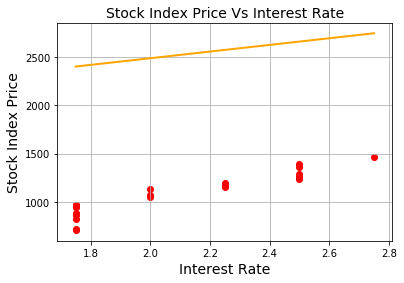

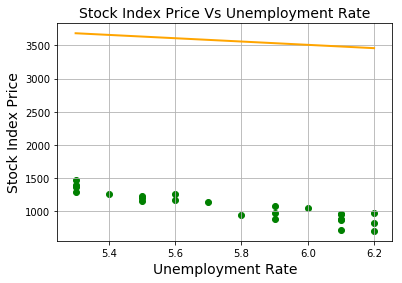

In [80]:
# First correlation
x = np.linspace(data['Interest_Rate'].min(), data['Interest_Rate'].max(), 5)
yhat = model.params['const'] + model.params['Interest_Rate'] * x
#yhat *= data['Interest_Rate'].mean()/data['Unemployment_Rate'].mean()
plt.plot(x, yhat, lw=2, c='orange')

plt.scatter(data['Interest_Rate'], data['Stock_Index_Price'], color='red')
plt.title('Stock Index Price Vs Interest Rate', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()
 
## Second correlation
x = np.linspace(data['Unemployment_Rate'].min(), data['Unemployment_Rate'].max(), 5)
yhat = model.params['const'] + model.params['Unemployment_Rate'] * x
#yhat *= data['Unemployment_Rate'].mean()/data['Interest_Rate'].mean()
plt.plot(x, yhat, lw=2, c='orange')

c = model.params['const'] * data['Interest_Rate'].std() + data['Interest_Rate'].mean()
plt.scatter(data['Unemployment_Rate'], data['Stock_Index_Price'], color='green')
plt.title('Stock Index Price Vs Unemployment Rate', fontsize=14)
plt.xlabel('Unemployment Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

Come è possibile vedere da questi due grafici, una correlazione lineare sembra esistere:

- quando i tassi di interesse salgono anche il prezzo dello stock sale (correlazione diretta)
- quando il tasso di disoccupazione sale, invece, il prezzo delo stock scende (correlazione inversa)

Le due dimensioni risultano molto fortemente correlate tra loro, come si vede dalla valutazione fatta qui sotto.

In [18]:
data[['Interest_Rate', 'Unemployment_Rate']].corr()

,Interest_Rate,Unemployment_Rate
Interest_Rate,1.000000,-0.925814
Unemployment_Rate,-0.925814,1.000000


<a id='section8'></a>
### Realizziamo la regressione con Pyhton

Passiamo ora a realizzare la regressione lineare con pyhton.

Quando lavoriamo con più features dobbiamo essere sicuri che queste siano comprese in un range di valori comune, per far questo abbiamo due possibilità:

- **Normalizzazione**: portiamo tutti i dati in un range compreso tra 0 e 1
- **Standardizzazione**: convertiamo i dati in una distribuzione normale con media 0 e deviazione standard 1.

Standardizziamo l'array con le features utilizzando la classe StandardScaler di scikit-learn

In [6]:
from sklearn.metrics import r2_score

X = data[['Interest_Rate', 'Unemployment_Rate']]
Y = data['Stock_Index_Price']

X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit(normalize=True)
Y_pred = model.predict(X)

print("R2 model: %f" % r2_score(Y, Y_pred))

R2 model: 0.897634


In [6]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Mon, 18 Mar 2019   Prob (F-statistic):           4.04e-11
Time:                        10:13:08   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1798.4040    899.248      2.000      0.059     -71.685    3668.493
Interest_Rate       345.5401    111.367      3.103      0.005     113.940     577.140
Unemployment_Rate  -250.1466    117.950     -2.121      0.046    -495.437      -4.856
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.530
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.551
Skew:                          -0.612   Prob(JB):                        0.461
Kurtosis:                       3.226   Cond. No.                         394.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id='section9'></a>
### Visualizziamo il risultato

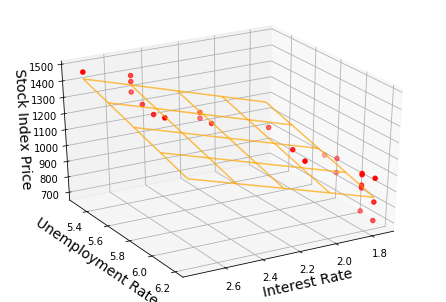

In [30]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(data['Interest_Rate'], data['Unemployment_Rate'], data['Stock_Index_Price'], color='red')
ax.set_xlabel('Interest Rate', fontsize=14)
ax.set_ylabel('Unemployment Rate', fontsize=14)
ax.set_zlabel('Stock Index Price', fontsize=14)

x = np.linspace(data['Interest_Rate'].min(), data['Interest_Rate'].max(), 5)
y = np.linspace(data['Unemployment_Rate'].min(), data['Unemployment_Rate'].max(), 5)
x, y = np.meshgrid(x, y)

z = model.params['const'] + model.params['Interest_Rate'] * x + model.params['Unemployment_Rate'] * y
z = z.reshape(x.shape)

ax.view_init(30, 60)
ax.plot_wireframe(x, y, z, color='orange', alpha=0.7)
plt.show()

[Clicca qui per tornare all'inizio della pagina](#start)<a id='start'></a>